# Problem 2: EDA & PCA 
The dataset Education - Post 12th Standard.csv is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sns.set(color_codes=True)

# Loading the data set

**We will  be loading the Education - Post 12th Standard-1 csv file using pandas. For this we will be using read_csv file.**

In [2]:
# Load Dataset and view top 5 Observations;
edu_df = pd.read_csv("Education - Post 12th Standard-1.csv")

# Automate EDA

In [3]:
# Extract EDA or Automate EDA using pandas profiling;
from pandas_profiling import ProfileReport
# To generate Report assign it to new variable
profile = ProfileReport(edu_df,title='Education',explorative=True)

In [4]:
# To save the report.
profile.to_file('Edu.html')

### 2.1	Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

# Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **Missing Values**
- **summary of the dataset**

In [5]:
edu_df.head().T

,0,1,2,3,4
Names,Abilene Christian University,Adelphi University,Adrian College,Agnes Scott College,Alaska Pacific University
Apps,1660,2186,1428,417,193
Accept,1232,1924,1097,349,146
Enroll,721,512,336,137,55
Top10perc,23,16,22,60,16
Top25perc,52,29,50,89,44
F.Undergrad,2885,2683,1036,510,249
P.Undergrad,537,1227,99,63,869
Outstate,7440,12280,11250,12960,7560
Room.Board,3300,6450,3750,5450,4120


In [6]:
#Check Shape of the Dataframe
row, col = edu_df.shape
print("There are total {}".format(row), "Observations and {}".format(col), "variables in the dataset")

There are total 777 Observations and 18 variables in the dataset


In [7]:
#Check info of the Dataframe
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [8]:
# Check for missing values in the Dataset;
edu_df.isnull().sum().sum()

0

In [9]:
#Summary of the Dataset
edu_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Names,777,777,Denison University,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apps,777,NaN,NaN,NaN,3001.64,3870.2,81,776,1558,3624,48094
Accept,777,NaN,NaN,NaN,2018.8,2451.11,72,604,1110,2424,26330
Enroll,777,NaN,NaN,NaN,779.973,929.176,35,242,434,902,6392
Top10perc,777,NaN,NaN,NaN,27.5586,17.6404,1,15,23,35,96
Top25perc,777,NaN,NaN,NaN,55.7967,19.8048,9,41,54,69,100
F.Undergrad,777,NaN,NaN,NaN,3699.91,4850.42,139,992,1707,4005,31643
P.Undergrad,777,NaN,NaN,NaN,855.299,1522.43,1,95,353,967,21836
Outstate,777,NaN,NaN,NaN,10440.7,4023.02,2340,7320,9990,12925,21700
Room.Board,777,NaN,NaN,NaN,4357.53,1096.7,1780,3597,4200,5050,8124


In [10]:
edu_df.dtypes.value_counts()

int64      16
object      1
float64     1
dtype: int64

# Check for Duplicate records

In [11]:
# Check for duplicate data
dup = edu_df.duplicated()
print(dup.sum())
edu_df[dup]

0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


**There are no duplicate records in the data set**

# Uni-variate analysis

In [12]:
import warnings
warnings.filterwarnings("ignore")

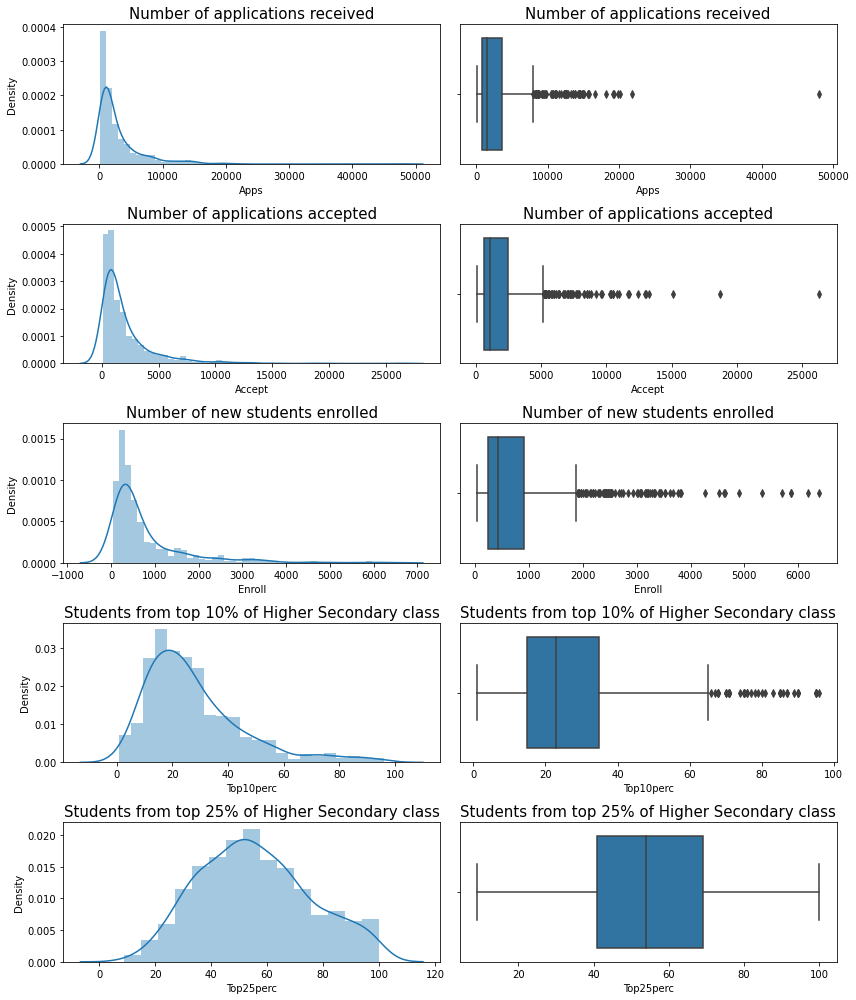

In [13]:
## Univariate Analysis except Names column
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(edu_df['Apps'] , ax=axes[0][0])
a.set_title("Number of applications received",fontsize=15)

a = sns.boxplot(edu_df['Apps'] , ax=axes[0][1])
a.set_title("Number of applications received",fontsize=15)

a = sns.distplot(edu_df['Accept'] , ax=axes[1][0])
a.set_title("Number of applications accepted",fontsize=15)

a = sns.boxplot(edu_df['Accept'] , ax=axes[1][1])
a.set_title("Number of applications accepted",fontsize=15)

a = sns.distplot(edu_df['Enroll'] , ax=axes[2][0])
a.set_title("Number of new students enrolled",fontsize=15)

a = sns.boxplot(edu_df['Enroll'] , ax=axes[2][1])
a.set_title("Number of new students enrolled",fontsize=15)


a = sns.distplot(edu_df['Top10perc'] , ax=axes[3][0])
a.set_title("Students from top 10% of Higher Secondary class",fontsize=15)

a = sns.boxplot(edu_df['Top10perc'] , ax=axes[3][1])
a.set_title("Students from top 10% of Higher Secondary class",fontsize=15)

a = sns.distplot(edu_df['Top25perc'] , ax=axes[4][0])
a.set_title("Students from top 25% of Higher Secondary class",fontsize=15)

a = sns.boxplot(edu_df['Top25perc'] , ax=axes[4][1])
a.set_title("Students from top 25% of Higher Secondary class",fontsize=15)

plt.tight_layout()
plt.show()

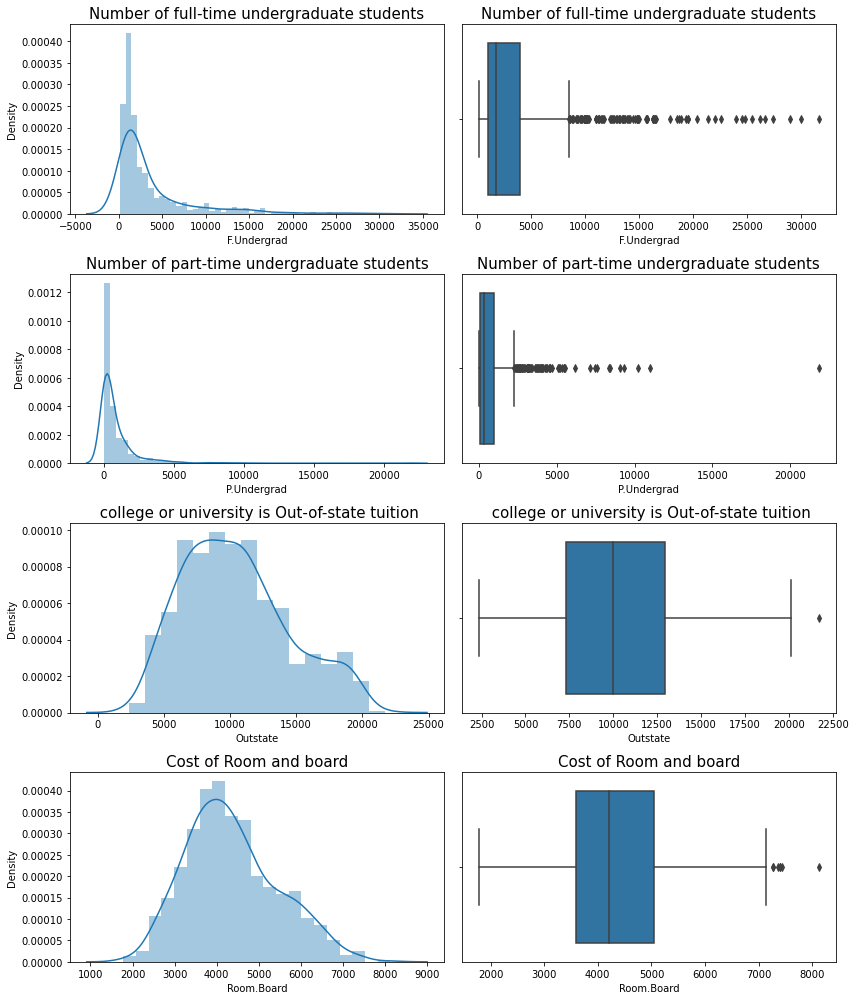

In [14]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(edu_df['F.Undergrad'] , ax=axes[0][0])
a.set_title("Number of full-time undergraduate students",fontsize=15)

a = sns.boxplot(edu_df['F.Undergrad'] , ax=axes[0][1])
a.set_title("Number of full-time undergraduate students",fontsize=15)

a = sns.distplot(edu_df['P.Undergrad'] , ax=axes[1][0])
a.set_title("Number of part-time undergraduate students",fontsize=15)

a = sns.boxplot(edu_df['P.Undergrad'] , ax=axes[1][1])
a.set_title("Number of part-time undergraduate students",fontsize=15)

a = sns.distplot(edu_df['Outstate'] , ax=axes[2][0])
a.set_title(" college or university is Out-of-state tuition",fontsize=15)

a = sns.boxplot(edu_df['Outstate'] , ax=axes[2][1])
a.set_title(" college or university is Out-of-state tuition",fontsize=15)


a = sns.distplot(edu_df['Room.Board'] , ax=axes[3][0])
a.set_title("Cost of Room and board",fontsize=15)

a = sns.boxplot(edu_df['Room.Board'] , ax=axes[3][1])
a.set_title("Cost of Room and board",fontsize=15)


plt.tight_layout()
plt.show()

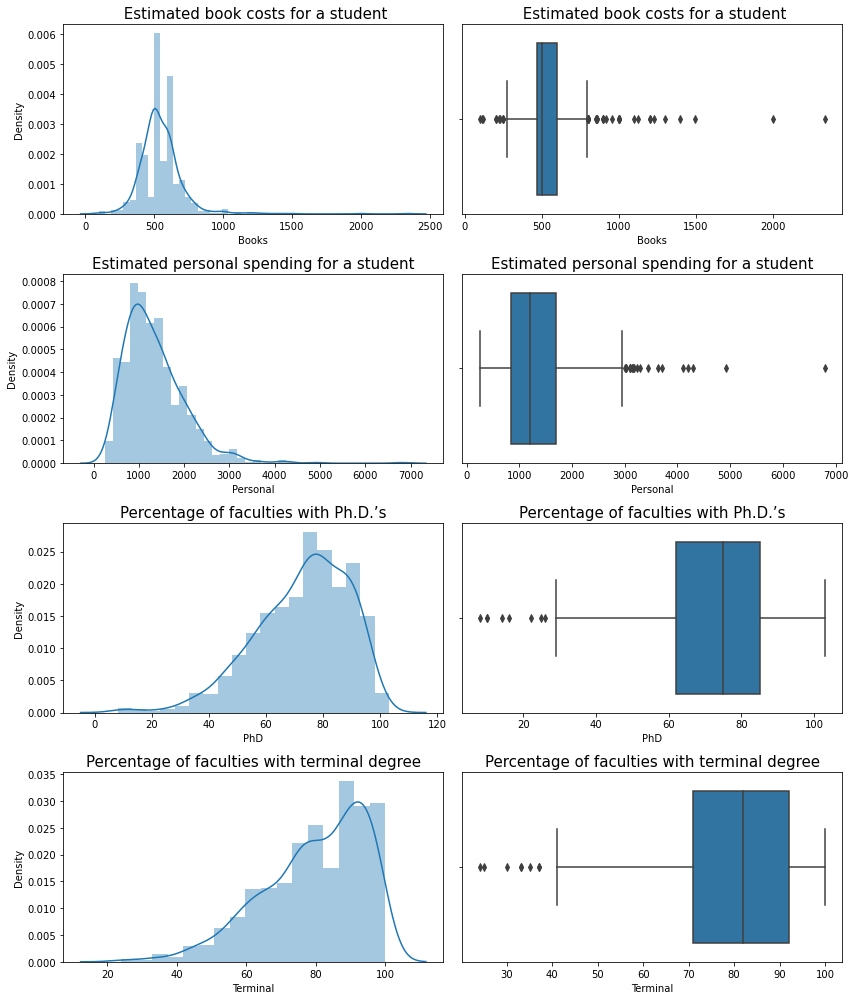

In [15]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(edu_df['Books'] , ax=axes[0][0])
a.set_title(" Estimated book costs for a student",fontsize=15)

a = sns.boxplot(edu_df['Books'] , ax=axes[0][1])
a.set_title(" Estimated book costs for a student",fontsize=15)


a = sns.distplot(edu_df['Personal'] , ax=axes[1][0])
a.set_title("Estimated personal spending for a student",fontsize=15)

a = sns.boxplot(edu_df['Personal'] , ax=axes[1][1])
a.set_title("Estimated personal spending for a student",fontsize=15)

a = sns.distplot(edu_df['PhD'] , ax=axes[2][0])
a.set_title("Percentage of faculties with Ph.D.’s",fontsize=15)

a = sns.boxplot(edu_df['PhD'] , ax=axes[2][1])
a.set_title("Percentage of faculties with Ph.D.’s",fontsize=15)

a = sns.distplot(edu_df['Terminal'] , ax=axes[3][0])
a.set_title("Percentage of faculties with terminal degree",fontsize=15)

a = sns.boxplot(edu_df['Terminal'] , ax=axes[3][1])
a.set_title("Percentage of faculties with terminal degree",fontsize=15)

plt.tight_layout()
plt.show()

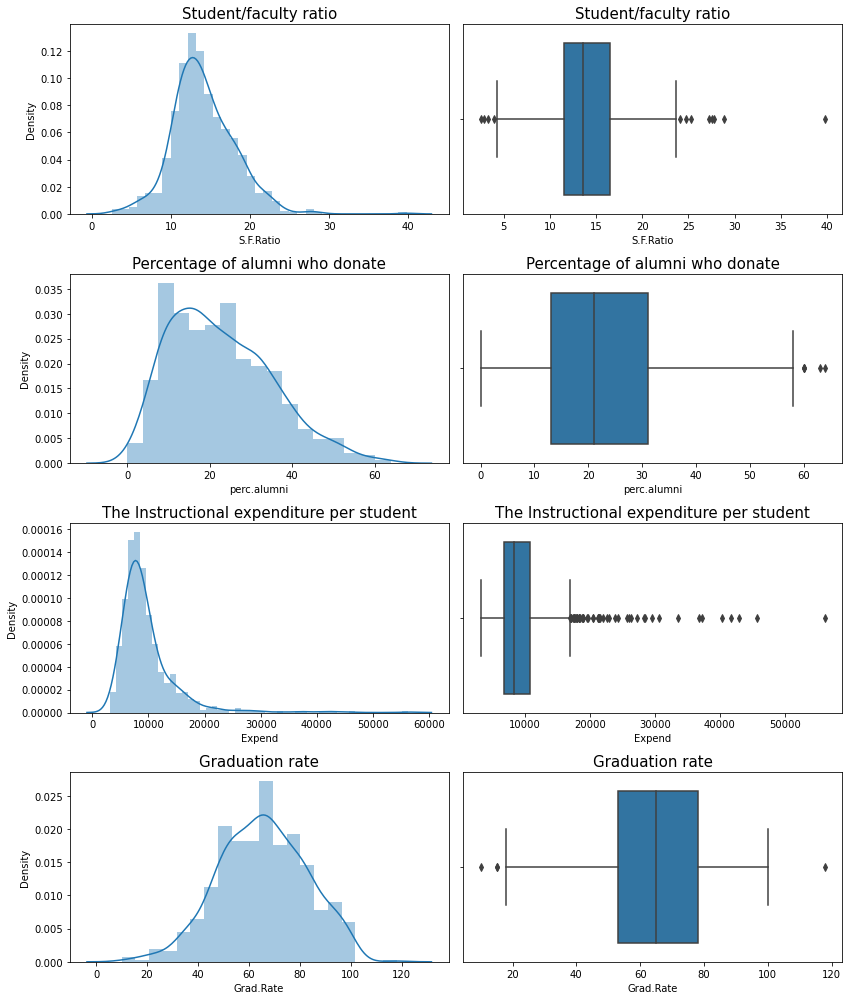

In [16]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(edu_df['S.F.Ratio'] , ax=axes[0][0])
a.set_title("Student/faculty ratio",fontsize=15)

a = sns.boxplot(edu_df['S.F.Ratio'] , ax=axes[0][1])
a.set_title("Student/faculty ratio",fontsize=15)

a = sns.distplot(edu_df['perc.alumni'] , ax=axes[1][0])
a.set_title("Percentage of alumni who donate",fontsize=15)

a = sns.boxplot(edu_df['perc.alumni'] , ax=axes[1][1])
a.set_title("Percentage of alumni who donate",fontsize=15)

a = sns.distplot(edu_df['Expend'] , ax=axes[2][0])
a.set_title("The Instructional expenditure per student",fontsize=15)

a = sns.boxplot(edu_df['Expend'] , ax=axes[2][1])
a.set_title("The Instructional expenditure per student",fontsize=15)

a = sns.distplot(edu_df['Grad.Rate'] , ax=axes[3][0])
a.set_title("Graduation rate",fontsize=15)

a = sns.boxplot(edu_df['Grad.Rate'] , ax=axes[3][1])
a.set_title("Graduation rate",fontsize=15)

plt.tight_layout()
plt.show()

**This distribution can also be visualised in another manner. We can also use the violin plot function from seaborn. The violin plot shows a vertical mirror image of the distribution along with the original distribution.**

<AxesSubplot:xlabel='Apps'>

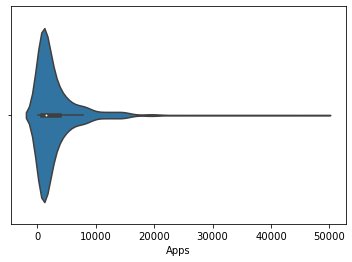

In [17]:
sns.violinplot(edu_df['Apps']) # plots a violin plt using the seaborn package.

# Check the Skewness

**Positively skewed:** Most frequent values are low and tail is towards high values.
- If **Mode< Median< Mean** then the distribution is positively skewed.

**Negatively skewed:** Most frequent values are high and tail is towards low values.
    
- If **Mode> Median> Mean** then the distribution is negatively skewed.

In [18]:
skewness = pd.DataFrame(edu_df.skew().sort_values()).reset_index()# to measure the skeweness of every attribute
skewness = skewness.rename(columns = {'index':'Attributes',0:'skewness'})
skewness

,Attributes,skewness
0,Terminal,-0.816542
1,PhD,-0.768170
2,Grad.Rate,-0.113777
3,Top25perc,0.259340
4,Room.Board,0.477356
5,Outstate,0.509278
6,perc.alumni,0.606891
7,S.F.Ratio,0.667435
8,Top10perc,1.413217
9,Personal,1.742497


# Bi- Variate Analysis:

In [19]:
# Check for correlation of variable
df_corr = edu_df.corr(method='pearson')

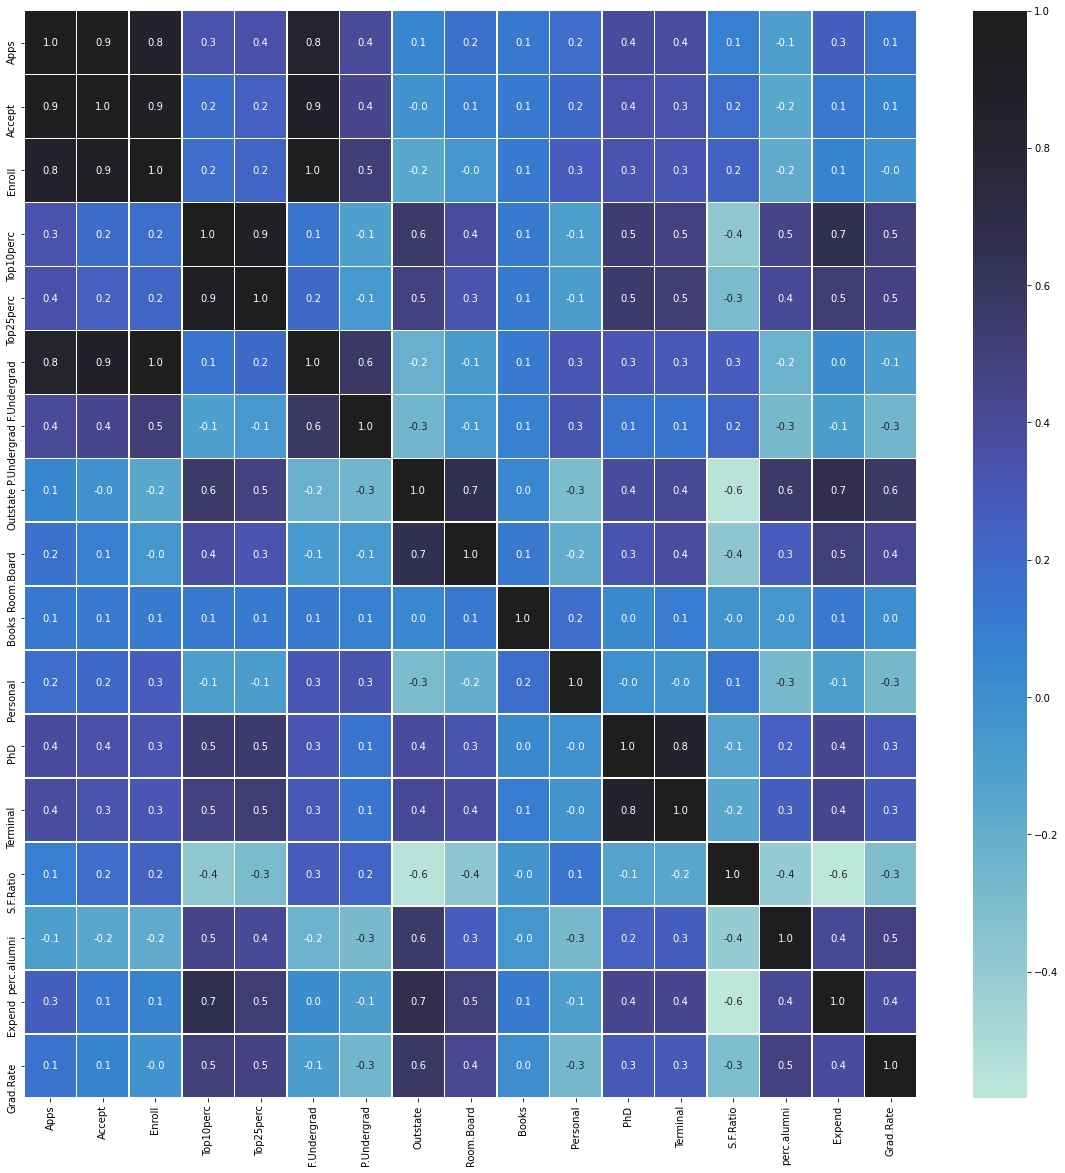

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

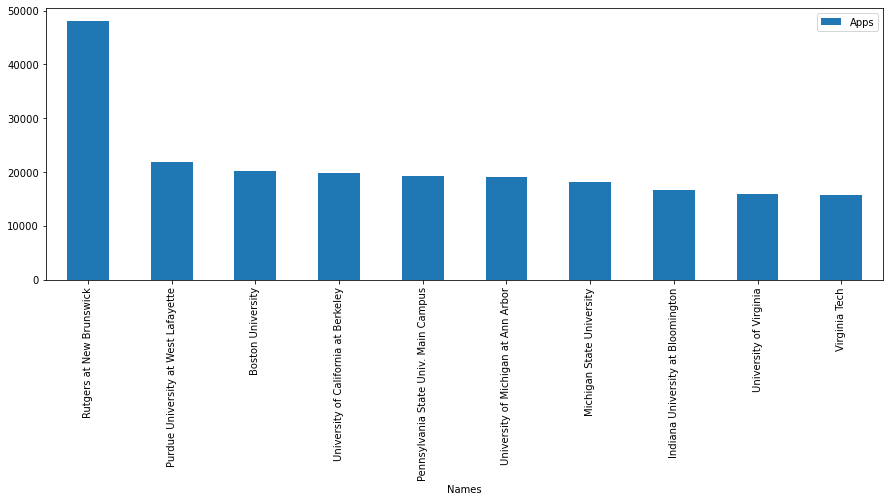

In [21]:
edu_df[['Names','Apps']].sort_values(by=['Apps'],ascending=False).reset_index().head(10).plot(x='Names',y='Apps',kind='bar', figsize=(15,5))

plt.show()

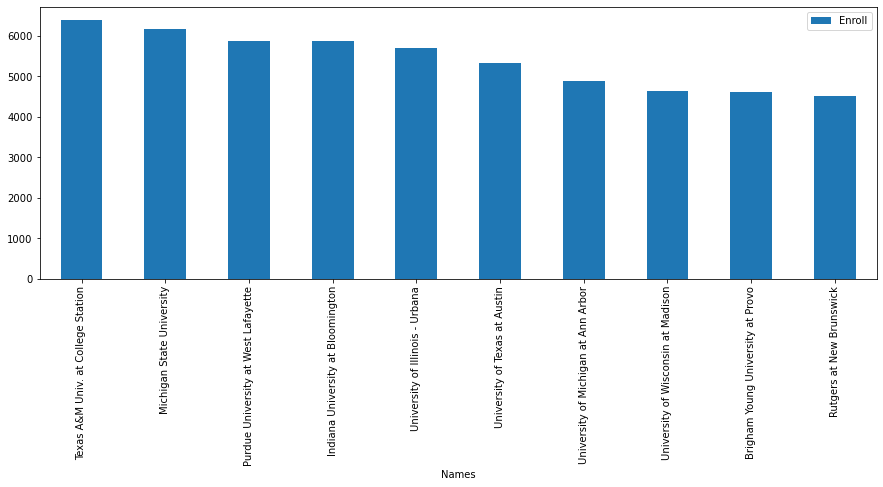

In [22]:
edu_df[['Names','Enroll']].sort_values(by=['Enroll'],ascending=False).reset_index().head(10).plot(x='Names',y='Enroll',kind='bar', figsize=(15,5))

plt.show()

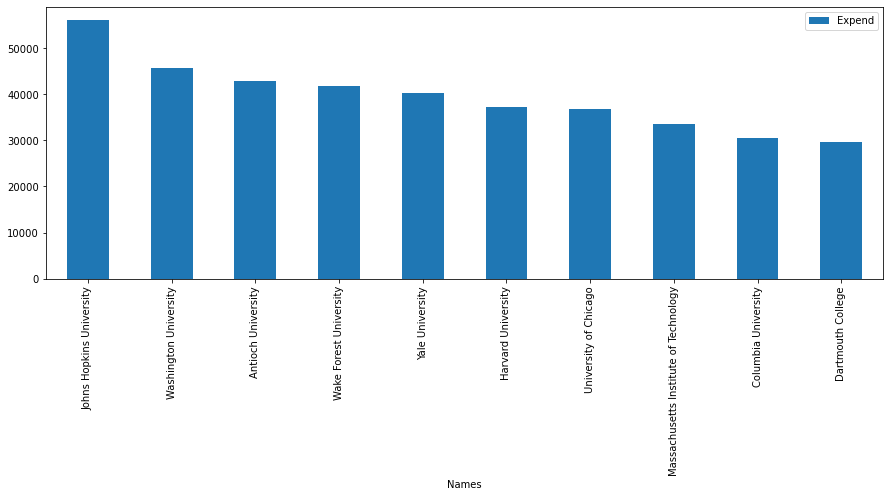

In [23]:
edu_df[['Names','Expend']].sort_values(by=['Expend'],ascending=False).reset_index().head(10).plot(x='Names',y='Expend',kind='bar',figsize=(15,5))
plt.show()

### 2.2	Scale the variables and write the inference for using the type of scaling function for this case study. 

# AND

### 2.4	Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

# Outlier Treatment

- **Plot a Boxplot to identify Outliers for a given Dataset:**

In [24]:
# Make a copy of original Dataframe
df1 = edu_df.copy() # To use it for standardization before outlier treatment
df2 = edu_df.copy() # To use it for Mix-Maxscaling before outlier treatment
# List all the column variables and store it into new variable col
col = list(df1.columns)
# Remove column variable 'Names' since it is a categorical variable;Not required Outlier treatment or scaling.
col.pop(0)

'Names'

# Identify Outliers for an unscaled data:

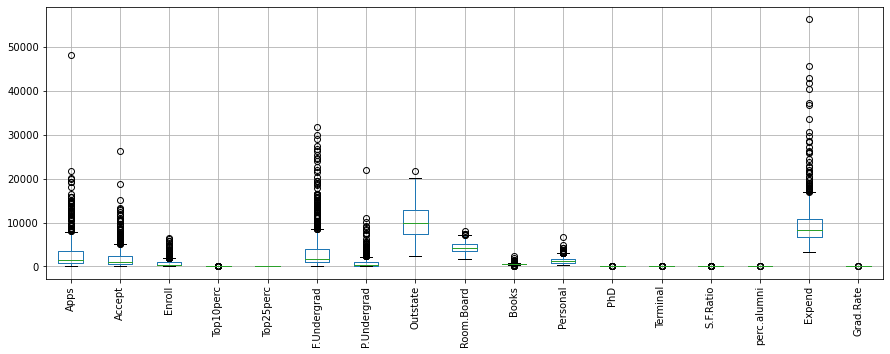

In [25]:
edu_df.boxplot(figsize=(15,5))
plt.xticks(rotation=90)
plt.show()

- **Out of 17 Numerical Variables except variable 'Top25perc' rest all the variables have outliers present in a given dataset.**
- **These outliers value needs to be teated and there are several ways of treating them:**
    
- **Drop the outlier value**
- **Replace the outlier value using the IQR**

**Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.**

In [26]:
def remove_outlier(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    LL = Q1 - (1.5*IQR)
    UL = Q3 + (1.5*IQR)
    return LL, UL

In [27]:
for i in col:
    ll, up = remove_outlier(edu_df[i])
    edu_df[i] = np.where(edu_df[i] > up, up, edu_df[i])
    edu_df[i] = np.where(edu_df[i] < ll, ll, edu_df[i])

# Identify Outliers for an unscaled data post outlier treatment:

<AxesSubplot:>

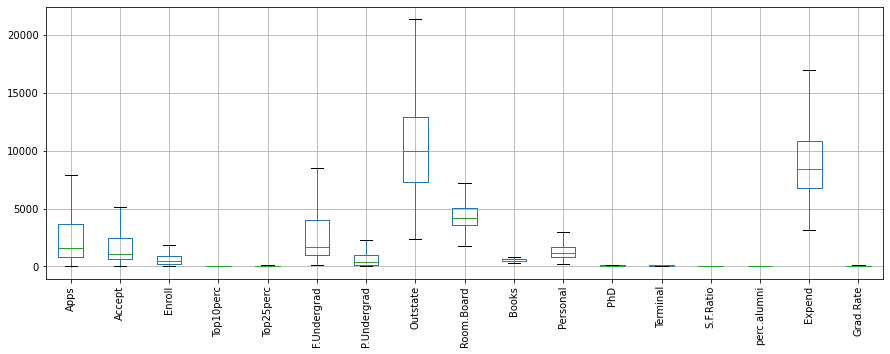

In [28]:
edu_df.boxplot(figsize=(15,5),rot=90)

**If we look at the box plots above,post treating the outlier there are no outliers in all these columns.**

In [29]:
# Check summary of the Dataset post Outlier treatment
edu_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,2571.352638,2422.195279,81.0,776.0,1558.0,3624.0,7896.0
Accept,777.0,1746.280566,1523.286632,72.0,604.0,1110.0,2424.0,5154.0
Enroll,777.0,660.388674,570.126836,35.0,242.0,434.0,902.0,1892.0
Top10perc,777.0,26.842986,15.582539,1.0,15.0,23.0,35.0,65.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,2935.648005,2700.233049,139.0,992.0,1707.0,4005.0,8524.5
P.Undergrad,777.0,655.884170,716.274014,1.0,95.0,353.0,967.0,2275.0
Outstate,777.0,10440.196268,4021.712447,2340.0,7320.0,9990.0,12925.0,21332.5
Room.Board,777.0,4355.438224,1090.666009,1780.0,3597.0,4200.0,5050.0,7229.5
Books,777.0,539.425997,115.229712,275.0,470.0,500.0,600.0,795.0


## Normalisation or Feature Scaling or Min-Max Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()

In [31]:
# scaling done before outlier treatment: [Normalization]
for i in col:
    df2[i] = minmax_scale.fit_transform(df2[[i]])

In [32]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,0.060830,0.080607,0.0,0.014475,0.030763,0.073793,1.0
Accept,777.0,0.074141,0.093347,0.0,0.020260,0.039531,0.089573,1.0
Enroll,777.0,0.117189,0.146166,0.0,0.032563,0.062765,0.136385,1.0
Top10perc,777.0,0.279564,0.185688,0.0,0.147368,0.231579,0.357895,1.0
Top25perc,777.0,0.514249,0.217635,0.0,0.351648,0.494505,0.659341,1.0
F.Undergrad,777.0,0.113030,0.153962,0.0,0.027076,0.049771,0.122715,1.0
P.Undergrad,777.0,0.039125,0.069724,0.0,0.004305,0.016121,0.044241,1.0
Outstate,777.0,0.418423,0.207800,0.0,0.257231,0.395145,0.546746,1.0
Room.Board,777.0,0.406294,0.172871,0.0,0.286412,0.381463,0.515448,1.0
Books,777.0,0.202041,0.073576,0.0,0.166667,0.180036,0.224599,1.0


## Identify Outliers for a Scaled data [Normalisation] before outlier treatment:

<AxesSubplot:>

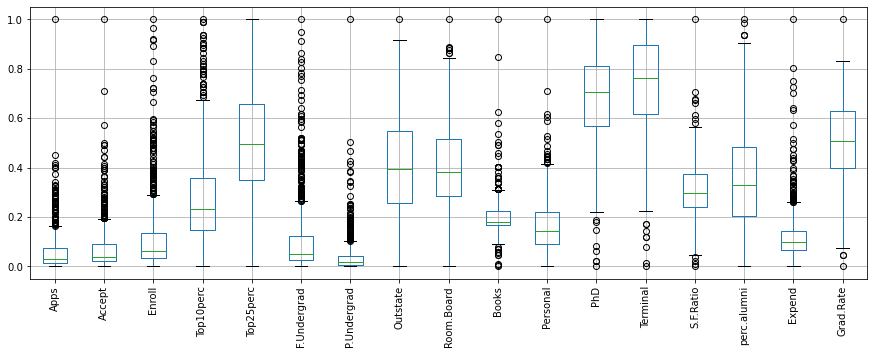

In [33]:
df2.boxplot(figsize=(15,5),rot=90)

In [34]:
# scaling done post outlier treatment: [Normalization]
for i in col:
    edu_df[i] = minmax_scale.fit_transform(edu_df[[i]])

In [35]:
edu_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,0.318663,0.309942,0.0,0.088932,0.188996,0.453359,1.0
Accept,777.0,0.329453,0.299742,0.0,0.104683,0.204250,0.462810,1.0
Enroll,777.0,0.336774,0.307015,0.0,0.111470,0.214863,0.466882,1.0
Top10perc,777.0,0.403797,0.243477,0.0,0.218750,0.343750,0.531250,1.0
Top25perc,777.0,0.514249,0.217635,0.0,0.351648,0.494505,0.659341,1.0
F.Undergrad,777.0,0.333510,0.322012,0.0,0.101723,0.186989,0.461034,1.0
P.Undergrad,777.0,0.287988,0.314984,0.0,0.041337,0.154793,0.424802,1.0
Outstate,777.0,0.426494,0.211753,0.0,0.262209,0.402791,0.557325,1.0
Room.Board,777.0,0.472601,0.200141,0.0,0.333425,0.444077,0.600055,1.0
Books,777.0,0.508512,0.221596,0.0,0.375000,0.432692,0.625000,1.0


## Identify Outliers for a Scaled data [Normalisation] post outlier treatment:

<AxesSubplot:>

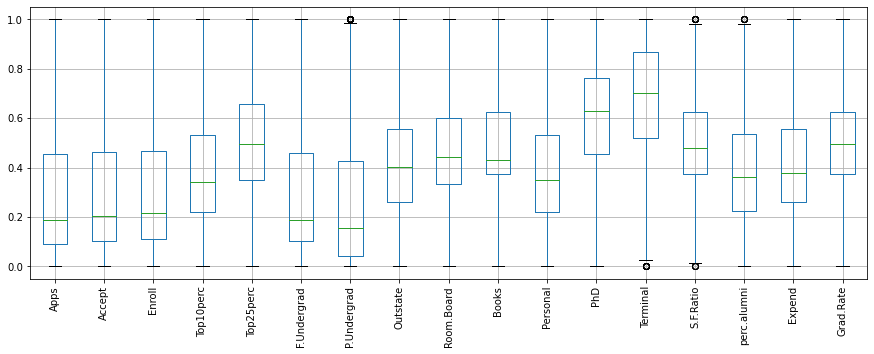

In [36]:
edu_df.boxplot(figsize=(15,5),rot=90)

## Standardization or Z-transformation

In [37]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [38]:
# scaling done before outlier treatment: [Standardization]
for i in col:
    df1[i] = scale.fit_transform(df1[[i]])

In [39]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,6.355797e-17,1.000644,-0.755134,-0.575441,-0.373254,0.160912,11.658671
Accept,777.0,6.774575e-17,1.000644,-0.794764,-0.577581,-0.371011,0.165417,9.924816
Enroll,777.0,-5.249269e-17,1.000644,-0.802273,-0.579351,-0.372584,0.131413,6.043678
Top10perc,777.0,-2.753232e-17,1.000644,-1.506526,-0.712380,-0.258583,0.422113,3.882319
Top25perc,777.0,-1.546739e-16,1.000644,-2.364419,-0.747607,-0.090777,0.667104,2.233391
F.Undergrad,777.0,-1.661405e-16,1.000644,-0.734617,-0.558643,-0.411138,0.062941,5.764674
P.Undergrad,777.0,-3.029180e-17,1.000644,-0.561502,-0.499719,-0.330144,0.073418,13.789921
Outstate,777.0,6.515595e-17,1.000644,-2.014878,-0.776203,-0.112095,0.617927,2.800531
Room.Board,777.0,3.570717e-16,1.000644,-2.351778,-0.693917,-0.143730,0.631824,3.436593
Books,777.0,-2.192583e-16,1.000644,-2.747779,-0.481099,-0.299280,0.306784,10.852297


## Identify Outliers for a Scaled data [Standardization] before outlier treatment

<AxesSubplot:>

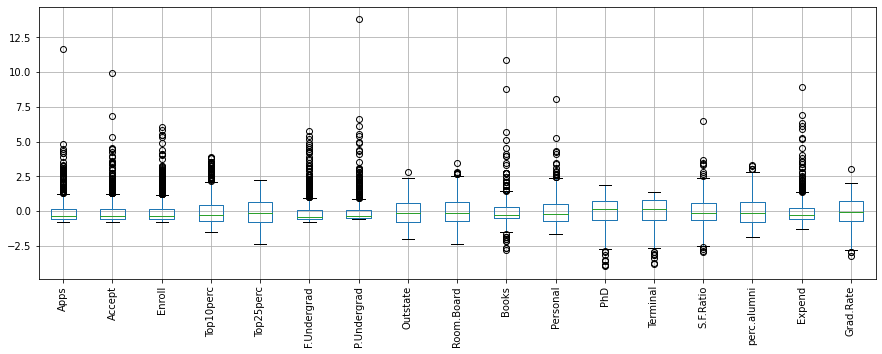

In [40]:
df1.boxplot(figsize=(15,5),rot=90)

In [41]:
# scaling done post outlier treatment: [Standardization]
for i in col:
    edu_df[i] = scale.fit_transform(edu_df[[i]])

In [42]:
edu_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,2.483713e-16,1.000644,-1.028801,-0.741686,-0.418631,0.434864,2.199689
Accept,777.0,2.436918e-16,1.000644,-1.099832,-0.750362,-0.417972,0.445193,2.238524
Enroll,777.0,1.925476e-16,1.000644,-1.097636,-0.734325,-0.397341,0.424058,2.161632
Top10perc,777.0,-2.250452e-18,1.000644,-1.659526,-0.760506,-0.246780,0.523809,2.450281
Top25perc,777.0,-1.418142e-16,1.000644,-2.364419,-0.747607,-0.090777,0.667104,2.233391
F.Undergrad,777.0,-3.368311e-16,1.000644,-1.036373,-0.720271,-0.455309,0.396277,2.071100
P.Undergrad,777.0,-3.300663e-16,1.000644,-0.914882,-0.783562,-0.423133,0.434633,2.261926
Outstate,777.0,1.274542e-16,1.000644,-2.015414,-0.776337,-0.112014,0.618245,2.710119
Room.Board,777.0,-2.892010e-16,1.000644,-2.362866,-0.695838,-0.142609,0.637234,2.636841
Books,777.0,-1.047353e-16,1.000644,-2.296251,-0.602889,-0.342372,0.526019,2.219381


## Identify Outliers for a Scaled data [Standardization] post outlier treatment

<AxesSubplot:>

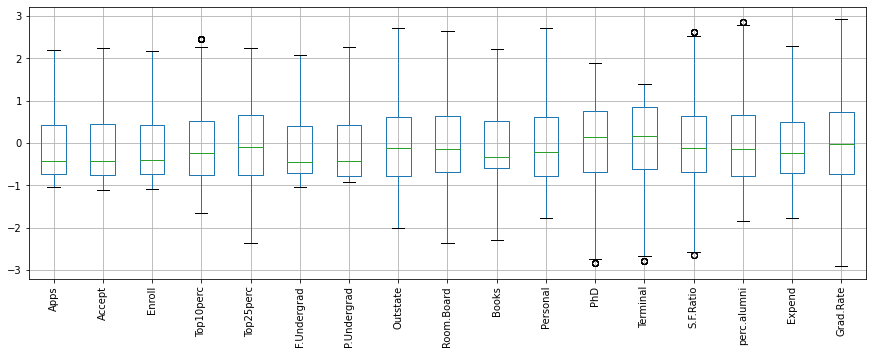

In [43]:
edu_df.boxplot(figsize=(15,5),rot=90)

## 2.3	Comment on the comparison between covariance and the correlation matrix after scaling.

 **`Covariance` indicates the direction of the linear relationship between variables. `Correlation` on the other hand measures both the strength and direction of the linear relationship between two variables.Correlation is a function of the covariance. 
 You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.**

**We can  state that below three approaches yield the same eigenvectors and eigenvalue pairs:**

- **Eigen decomposition of the covariance matrix after standardizing the data.**

- **Eigen decomposition of the correlation matrix.**

- **Eigen decomposition of the correlation matrix after standardizing the data.**

**Finally we can say that after scaling - the covariance and the correlation have the same values**

## 2.5	Build the covariance matrix, eigenvalues, and eigenvector.

# PCA

**PCA is a statistical technique and uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. Also PCA is a tool to reduce multidimensional data to lower dimensions while retaining most of the information. Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible.**

**This PCA can only be done on continuous variables**

## Drop 'Names' column

In [44]:
# Since Names column has unique values , so will remove it from the dataset.More over there is no point in adding Names for PCA.
edu_df=edu_df.drop(["Names"],axis=1)

In [45]:
edu_df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


## Create a covariance matrix for identifying Principal components

In [46]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(edu_df.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

## Identify eigenvalues and eigenvectors

In [49]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]


Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01 -8.10177245e-02  9.87761685e-02
   2.19898081e-01 -2.18800617e-03  2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02 -8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01 -1.07658626e-01  1.18140437e-01
   1.89634940e-01  1.65212882e-02  1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01 -4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01 -8.55296892e-02  9.30717094e-03
   1.62314818e-01  6.80794143e-02  1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.

**We see that there are 4 eigenvalues greater than 1**

## 2.6	Write the explicit form of the first PC (in terms of Eigen Vectors).

**To find the explicit form of first PC.**
- **Calculate matrix multiplication of the original data with the eigenvectors.**

In [48]:
# Display top 10 eigen vec of first principal component:
pca = np.array(edu_df.dot(eig_vecs.T[0]))
pca[:10]

array([ 1.60249937,  1.80467545,  1.60828257, -2.80364434,  2.20086769,
        0.73016388, -0.00451649, -1.83606666, -0.61923075,  2.93435271])

## 2.7	Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?Perform PCA and export the data of the Principal Component scores into a data frame.


## Cumulative Distribution of Eigenvalues

In [49]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


## Scree plot

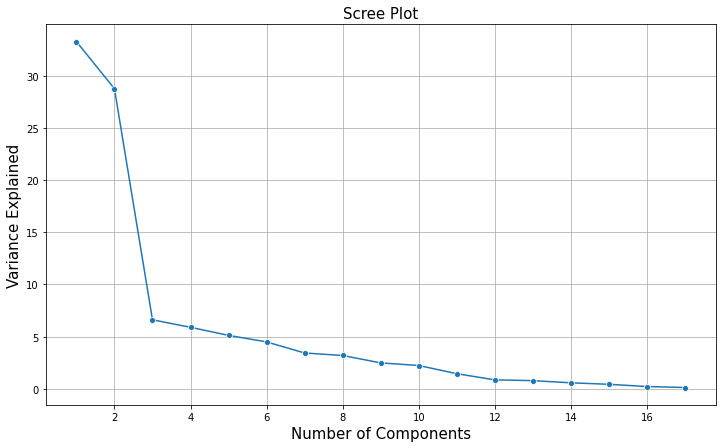

In [50]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

- **Visually we can observe that their is steep drop in variance explained with increase in number of PC's.**

## Plot Cumulative explained variance and individual explained variance vs Principal Components

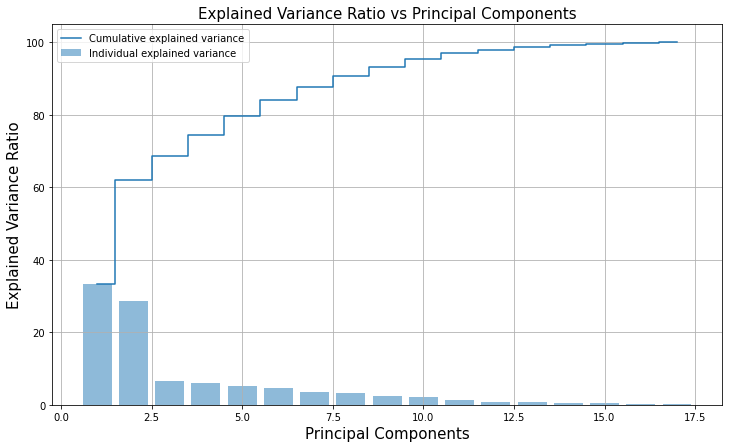

In [51]:
# Ploting 
plt.figure(figsize=(12 ,7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

## Use PCA  from sklearn's decomposition class and find Principal Components

In [53]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)
pca = PCA(n_components=5)
principalComponents_edu = pca.fit_transform(edu_df)
principalComponents_edu.transpose()

array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.03004485,  2.12212771, -0.50151251, ...,  0.32216074,
         1.32596426, -1.42543823],
       [-1.0084225 ,  3.13894101, -0.03637349, ..., -0.58725907,
         0.07770816, -1.3002738 ],
       [-0.36688638,  2.45321124,  0.76599674, ...,  0.17522345,
         1.3685207 ,  0.7209173 ]])

In [54]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893])

In [55]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([33.3, 62.1, 68.7, 74.6, 79.7])

**The Cumulative % gives the percentage of variance accounted for by the n components. For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the number of components by selecting the components which explained the high variance.**

**In the above array we see that the first feature explains 54.1% of the variance within our data set while the first two explain 72.2 and so on. If we employ 4 features we capture ~ 85% of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained).**

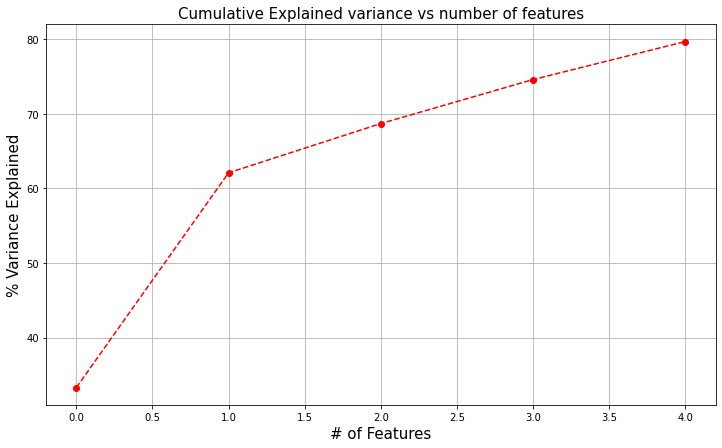

In [56]:
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()

- **Create a DataFrame that will have the principal component values for all 777 Observations.**

In [57]:
pca_1 = edu_df.dot(eig_vecs.T[0])
pca_2 = edu_df.dot(eig_vecs.T[1])
pca_3 = edu_df.dot(eig_vecs.T[2])
pca_4 = edu_df.dot(eig_vecs.T[4])
pca_5 = edu_df.dot(eig_vecs.T[5])
pca_df = pd.DataFrame(pca_1, columns=['principal component 1'])
pca_df['principal component 2'] = pca_2
pca_df['principal component 3'] = pca_3
pca_df['principal component 4'] = pca_4
pca_df['principal component 5'] = pca_5

In [58]:
pca_df.head(10)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,1.602499,0.993683,0.030045,-0.366886,0.697476
1,1.804675,-0.070415,2.122128,2.453212,-0.994859
2,1.608283,-1.382792,-0.501513,0.765997,1.026237
3,-2.803644,-3.367395,0.367768,-1.192601,1.457080
4,2.200868,-0.099348,3.122523,-1.828044,-0.140915
5,0.730164,-1.998741,0.237171,0.062740,0.821044
6,-0.004516,-1.884603,0.237183,-1.878438,0.132645
7,-1.836067,-1.733341,-0.995891,-0.996701,0.117335
8,-0.619231,-2.459100,-1.823771,-0.341261,0.977575
9,2.934353,-1.106131,2.142631,1.926359,0.320840


# Correlation between components and features

In [59]:
df_comp = pd.DataFrame(pca.components_,columns=list(edu_df))
df_comp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.262172,0.230562,0.189276,0.338875,0.334691,0.163293,0.022480,0.283547,0.244187,0.096708,-0.035230,0.326411,0.323116,-0.163152,0.186611,0.328956,0.238822
1,0.314136,0.344624,0.382813,-0.099319,-0.059506,0.398636,0.357550,-0.251864,-0.131909,0.093974,0.232440,0.055139,0.043033,0.259805,-0.257093,-0.160009,-0.167524
2,-0.081018,-0.107659,-0.085530,0.078829,0.050794,-0.073708,-0.040357,-0.014939,0.021138,0.697121,0.530973,-0.081113,-0.058979,-0.274151,-0.103716,0.184206,-0.245336
3,0.098776,0.118140,0.009307,-0.369115,-0.416824,0.013950,0.225351,0.262975,0.580894,-0.036156,-0.114983,-0.147261,-0.089008,-0.259486,-0.223982,0.213756,-0.036192
4,0.219898,0.189635,0.162315,0.157211,0.144449,0.102729,-0.095679,0.037275,-0.069108,0.035406,-0.000475,-0.550787,-0.590407,-0.142843,0.128216,-0.022424,0.356843


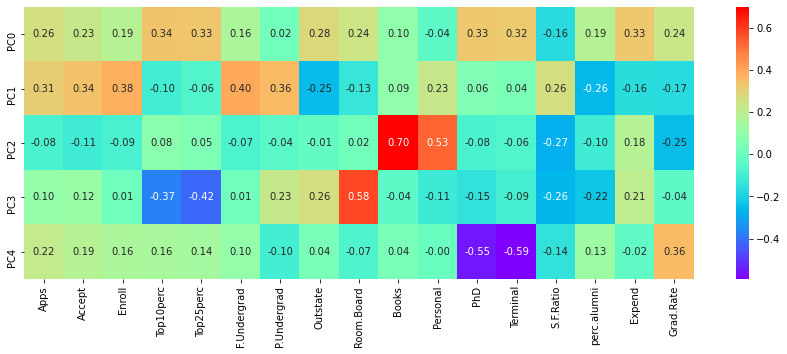

In [60]:
plt.figure(figsize=(15,5))
sns.heatmap(df_comp,cmap='rainbow',annot=True,fmt='.2f',yticklabels=['PC0','PC1','PC2','PC3','PC4'])
plt.show()